# 매트릭스 연산의 의미 이해
## 이진 분류 예시
- 키와 몸무게를 보고, 운동종목(sports):축구/농구, 성별(sex):남/여, 나이(age):장년/청소년 등 세가지 목적변수를 구분하는 예
- 입력(X)는 키와 몸무게 이고, 세가지 목적 변수를 각각 y1, y2, y3라고 하겠다

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (5,4)
from numpy import random

## 20명의 샘플 데이터 생성

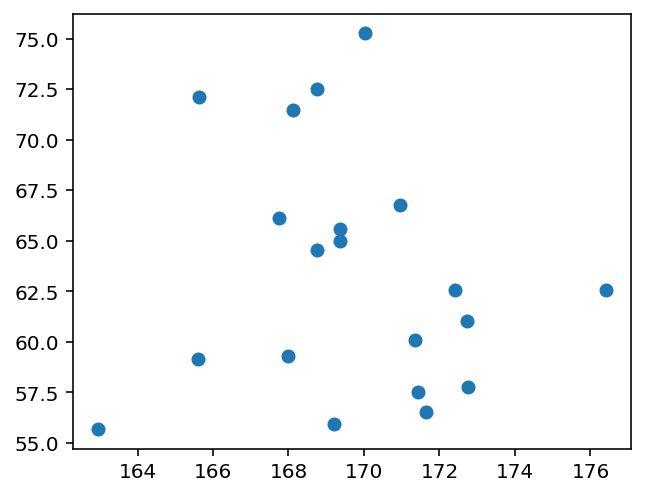

In [2]:
n_samples = 20
random.seed(15)
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df = pd.DataFrame({"height": height, "weight": weight})
plt.scatter(height, weight)

## 임의로 운동종목, 성별, 나이를 지정한다
- 축구, 농구 = 1,0
- 남, 여 = 1,0
- 장년, 청년 = 1,0

In [3]:
z = df.sort_values('height')
y1 = [1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0]
y2 = [0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1]
y3 = [0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0]
z["sports"] = y1
z['sex'] = y2
z['age'] = y3
z

,height,weight,sports,sex,age
5,162.96,55.70,1,0,0
6,165.60,59.15,1,0,0
7,165.64,72.10,1,1,1
14,167.76,66.15,1,1,1
3,168.00,59.30,1,0,0
9,168.12,71.45,1,1,1
8,168.76,72.50,1,1,1
0,168.76,64.55,1,1,0
10,169.20,55.95,0,0,0
2,169.36,65.60,1,1,1


In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = z[["height", "weight"]]

## 이진 분류 경계 그리는 함수

In [5]:
def plot_dec_boundary(X,y,marker='o'):
    model.fit(X, y)
    w1, w2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
    xs = np.array((162, 177))
    ys = -(w1/w2)*xs - b/w2
    plt.plot(xs,ys, c='r')
    plt.scatter(X.height,X.weight, c=y,s=20,marker=marker,cmap='bwr')  
    return (w1, w2, b)

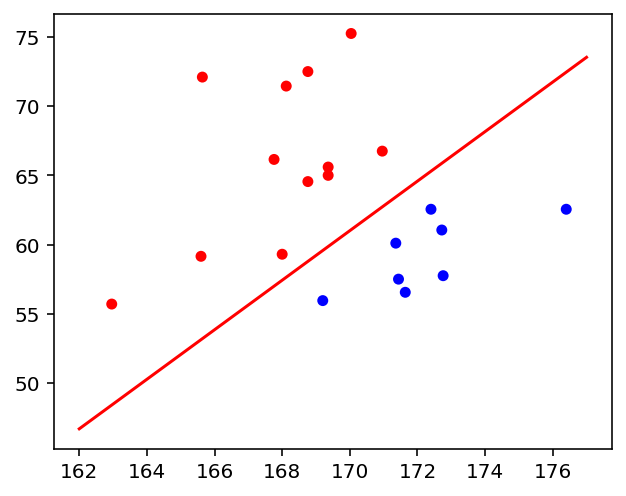

In [6]:
W_1 = plot_dec_boundary(X,z.sports,marker='o')

### $y_{1} = w_{11}x_{1}+w_{12}x_{2}+b_{1} > 0 : 축구 $
### W_1 = ($w_{11}, w_{12}, b_{1}$)

In [7]:
W_1

(-1.175716107461862, 0.6569615382094327, 159.79585464419654)

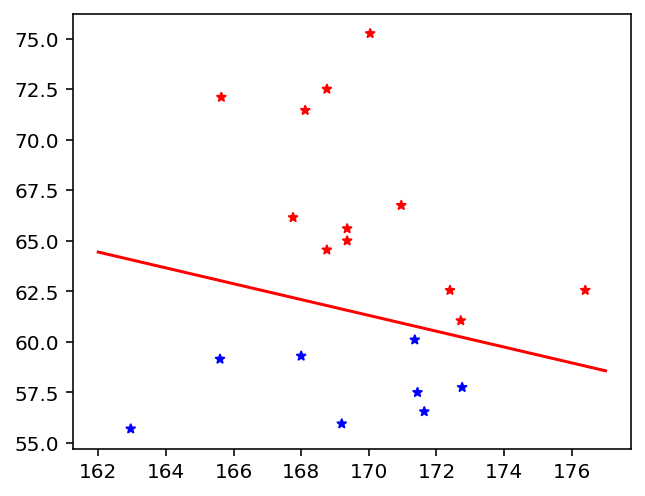

In [8]:
W_2 = plot_dec_boundary(X,z.sex,marker='*')

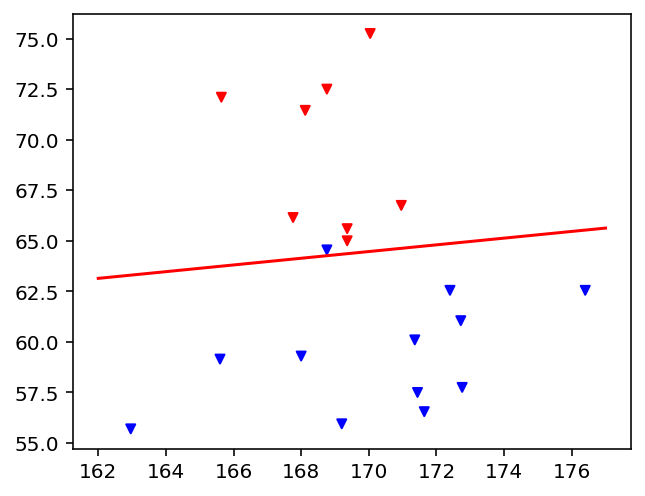

In [9]:
W_3 = plot_dec_boundary(X,z.age,marker='v')

In [10]:
W = np.vstack((W_1, W_2, W_3))
W.round(2)

array([[  -1.18,    0.66,  159.8 ],
       [   0.45,    1.15, -147.06],
       [  -0.18,    1.09,  -39.65]])

$y_{1} = w_{11}x_{1}+w_{12}x_{2}+b_{1} > 0 : 축구 $  
$y_{2} = w_{21}x_{1}+w_{22}x_{2}+b_{2} > 0 : 남성 $   
$y_{3} = w_{31}x_{1}+w_{32}x_{2}+b_{3} > 0 : 장년 $   

$\begin{bmatrix} y_{1} & y_{2} & y_{3} \end{bmatrix} = \begin{bmatrix} x_{1} & x_{2} & 1 \end{bmatrix} 
\begin{bmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \\ b_{1} & b_{2} & b_{3} \end{bmatrix}$

## 임의의 샘플값 X로부터 3개의 목적변수를 예측

In [11]:
X_sample=np.array([[164,60,1],[170,70,1],[170,55,1],[173,63,1]]) # 4명의 임의의 샘플값
y_score = np.matmul(X_sample,W.T)
y_score

array([[  6.39610531,  -4.20804681,  -3.79379704],
       [  5.91142405,   9.99561898,   6.04573028],
       [ -3.94299902,  -7.25767061, -10.34379658],
       [ -2.21445504,   3.2948202 ,  -2.14612755]])

### y_score

$\begin{bmatrix} y_{11}&y_{12} &y_{13}  \\ y_{21}&y_{22} &y_{23} \\ y_{31}&y_{32} &y_{33} \\ y_{41}&y_{42} &y_{43} \end{bmatrix} = \begin{bmatrix} x_{11} & x_{12} & 1 \\ x_{21} & x_{22} & 1 \\ x_{31} & x_{32} & 1 \\ x_{41} & x_{42} & 1\end{bmatrix} 
\begin{bmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \\ b_{1} & b_{2} & b_{3} \end{bmatrix}$

## 이진 분류

In [12]:
y_pred = (y_score > 0).astype('int')
y_pred

array([[1, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 0]])

In [13]:
df = pd.DataFrame(y_pred, columns=['sports','sex','age'])
df

,sports,sex,age
0,1,0,0
1,1,1,1
2,0,0,0
3,0,1,0


In [15]:
X_s = pd.DataFrame(X_sample[:,(0,1)], columns=['키','몸무게'])
X_s

,키,몸무게
0,164,60
1,170,70
2,170,55
3,173,63


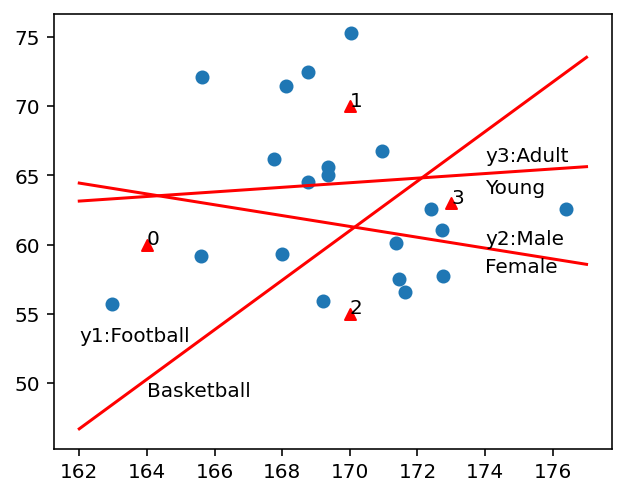

In [16]:
plt.scatter(X.height,X.weight)
xs = np.array((162, 177))
for w in [W_1, W_2, W_3]:
    ys = -(w[0]/w[1])*xs - w[2]/w[1]
    plt.plot(xs,ys, c='r')
plt.text(162,53,"y1:Football")
plt.text(164,49,"Basketball")
plt.text(174,60,"y2:Male")
plt.text(174,58,"Female")
plt.text(174,66,"y3:Adult")
plt.text(174,63.7,"Young")
plt.scatter(X_s['키'], X_s['몸무게'], c ='r', s=30, marker='^')
for i in range(len(X_s)):
    plt.text(X_s['키'][i], X_s['몸무게'][i], str(X_s.index[i]))

In [17]:
df.sports = df.sports.map({1:"축구", 0:"농구"})
df.sex = df.sex.map({1:"남", 0:"여"})
df.age = df.age.map({1:"장년", 0:"청년"})

In [18]:
pd.concat((X_s, df), axis=1)

,키,몸무게,sports,sex,age
0,164,60,축구,여,청년
1,170,70,축구,남,장년
2,170,55,농구,여,청년
3,173,63,농구,남,청년
